# Five most important Pandas Techniques for Data Manipulation in Python

Real-world data is messy. That’s why libraries like pandas are so valuable. 
Using pandas we can take the pain out of data manipulation by extracting, filtering, and transforming data in DataFrames, clearing a path for quick and reliable data. analysis.
In this article, we will give a tutorial on some useful pandas techniques that are very important for dealing with data using python.
    1.Importing data
    2.Filtering
    3.concatenating 
    4.Apply Function
    5.Plotting
First of all, we have to import pandas.

In [92]:
import pandas as pd

## Importing data using pandas

Pandas library offers many different possibilities for loading files of different formats.
### csv files:
A comma-separated values (CSV) file is a plaintext file with a .csv extension that holds tabular data. This is one of the most popular file formats for storing large amounts of data.

In [93]:
titanic_df = pd.read_csv('titanic.csv')

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


### JSON files:
JSON is plain text, but has the format of an object, and is well known in the world of programming, including Pandas.
In our examples we will be using a JSON file called 'data.json'.

In [94]:
df = pd.read_json('data.json')

df.head()

,COUNTRY,POP,AREA,GDP,CONT,IND_DAY
CHN,China,1398.72,9596.96,12234.78,Asia,None
IND,India,1351.16,3287.26,2575.67,Asia,1947-08-15T00:00:00Z
USA,US,329.74,9833.52,19485.39,N.America,1776-07-04T00:00:00Z
IDN,Indonesia,268.07,1910.93,1015.54,Asia,1945-08-17T00:00:00Z
BRA,Brazil,210.32,8515.77,2055.51,S.America,1822-09-07T00:00:00Z


### HTML files:
An HTML is a plaintext file that uses hypertext markup language to help browsers render web pages. The extensions for HTML files are .html and .htm. 

In [95]:
df1 = pd.read_html('https://en.wikipedia.org/wiki/Minnesota') # list of tables

df1[6].tail() # displays the last five rows of the first table

,Year,Office,GOP,DFL,Others
21,1996,President,35.0%,51.1%,13.9%
22,1996,Senator,41.3%,50.3%,8.4%
23,1994,Governor,63.3%,34.1%,2.6%
24,1994,Senator,49.1%,44.1%,6.8%
25,1992,President,31.9%,43.5%,24.6%


## Retrieving informations from DataFrame:

In order to better understand our dataset, we should know more about it using some pandas methods that describe our data.

### (rows, columns)

In [96]:
df.shape

(20, 6)

### Describe index

In [97]:
df.index

Index(['CHN', 'IND', 'USA', 'IDN', 'BRA', 'PAK', 'NGA', 'BGD', 'RUS', 'MEX',
       'JPN', 'DEU', 'FRA', 'GBR', 'ITA', 'ARG', 'DZA', 'CAN', 'AUS', 'KAZ'],
      dtype='object')

### Summary statistics

In [98]:
df.describe()

,POP,AREA,GDP
count,20.000000,20.000000,20.00000
mean,248.905500,4082.182500,3036.14250
std,394.546143,4706.507539,4706.00783
min,18.530000,147.570000,159.41000
25%,56.505000,575.002500,572.06000
50%,126.400000,2173.060000,1588.93500
75%,206.862500,7897.957500,2594.67500
max,1398.720000,17098.250000,19485.39000


### Median of values

In [99]:
df.median()

POP      126.400
AREA    2173.060
GDP     1588.935
dtype: float64

## Filtering Data:

### Selecting columns by data type

We can use the pandas.DataFrame.select_dtypes(include=None, exclude=None) method to select columns based on their data types. The method accepts either a list or a single data type in the parameters include and exclude. It is important to keep in mind that at least one of these parameters (include or exclude) must be supplied and they must not contain overlapping elements.

In this example, we want to select the numeric columns (both integers and floats) of the dataframe by passing in the string 'number' to the include parameter.

In [100]:
numeric_df = df.select_dtypes(include='number')

numeric_df.head()

,POP,AREA,GDP
CHN,1398.72,9596.96,12234.78
IND,1351.16,3287.26,2575.67
USA,329.74,9833.52,19485.39
IDN,268.07,1910.93,1015.54
BRA,210.32,8515.77,2055.51


### Selecting disjointed rows and columns

To select multiple rows and columns, we need to pass two list of values to both indexers. The code below shows how to extract the country, the population and the GDP of countries with id CHN and IND.

In [101]:
df.loc[['CHN', 'IND'], ['COUNTRY', 'POP', 'GDP']]

,COUNTRY,POP,GDP
CHN,China,1398.72,12234.78
IND,India,1351.16,2575.67


## Apply function:

The pandas .apply() method takes a function as an input and applies this function to an entire DataFrame.

### Calculation the number of human inhabitants per square kilometer

First, we will call the .apply() methos on our dataframe. Then use the lambda function to iterate over the rows of the dataframe. For every row, we grab the 'POP' column and divide it by the 'AREA' column. Finally, we will specify the axis=1 to tell the .apply() method that we want to apply it on the rows instead of columns.

In [102]:
df.apply(
    lambda row: row['POP']*1000/row['AREA'],
    axis=1
)

CHN     145.746153
IND     411.029246
USA      33.532245
IDN     140.282480
BRA      24.697708
PAK     233.255094
NGA     217.543328
BGD    1132.276208
RUS       8.585089
MEX      64.437634
JPN     333.941847
DEU     232.477388
FRA     104.607604
GBR     273.979381
ITA     200.305303
ARG      16.163142
DZA      18.213575
CAN       3.764771
AUS       3.311224
KAZ       6.800250
dtype: float64

## Visualizing our data

We want to vusualize how chine population increases through past years.
First of all, we will load data from wikepedia using html file like what we have seen from the begining.
We are setting the first column as index by passing index_col as parameter and setting it to 0.

In [103]:
china_df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_China', index_col=0)[5]

china_df.head()

,Midyear population,Live births1,Deaths1,Natural change1,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rate
1949,537371000,19345000,10747000,8598000,36.0,20.0,16.0,NaN
1950,546815000,20232000,9843000,10389000,37.0,18.0,19.0,5.29
1951,557480000,21073000,9923000,11150000,37.8,17.8,20.0,NaN
1952,568910000,21050000,9671000,11379000,37.0,17.0,20.0,NaN
1953,581390000,21511000,8139000,13372000,37.0,14.0,23.0,NaN


Now that we have all data we need. We are ready to plot our dataframe.

<AxesSubplot:title={'center':'China population'}>

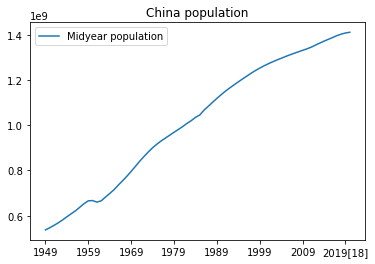

In [104]:
china_df.plot(kind='line', y='Midyear population', title='China population')